# Beta distribution

Continuous probability distribution.

$$p(x; \alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} x^{\alpha - 1} (1 - x)^{1 - \beta}$$

Probability density function.

* The beta distribution is restricted to be between 0 and 1.

* It enjoys a great versatility. As we can see in the next figure, the distribution adopts several shapes, including a uniform distribution, Gaussian-like distributions, U-like distributions, and so on.

* The beta distribution is the conjugate prior of the binomial distribution. A conjugate prior of a likelihood is a prior that, when used in combination with the given likelihood, returns a posterior with the same functional form as the prior. There are other pairs of conjugate priors, for example, the Gaussian distribution is the conjugate prior of itself

## Acknowledgements

* **Osvaldo Martin - Bayesian Analysis with Python**. Great!

## Fixed plots

In [1]:
import numpy as np
from __future__ import division
from scipy import stats
import matplotlib.pyplot as plt
import itertools

In [2]:
values = [0.5, 1, 2, 3]
n_values = len(values)

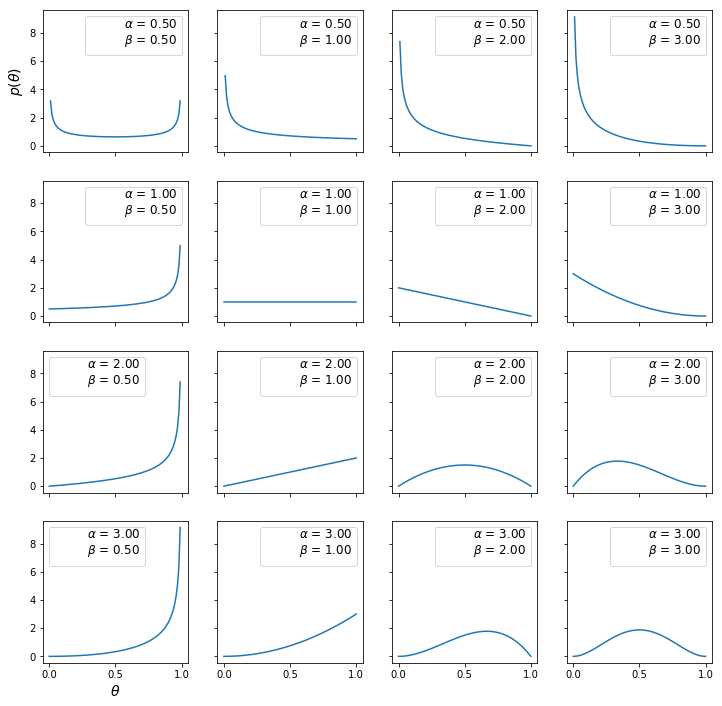

In [4]:
x = np.linspace(0, 1, 100)

fig, ax = plt.subplots(n_values, n_values, sharex=True, sharey=True, figsize=(12, 12))

for i, j in itertools.product(range(n_values), range(n_values)):
    alpha = values[i]; beta = values[j]
    p_x = stats.beta(alpha, beta).pdf(x)
    ax[i,j].plot(x, p_x)
    ax[i,j].plot(0, 0, label="$\\alpha$ = {:3.2f}\n$\\beta$ = {:3.2f}".format(alpha, beta), alpha=0)
    ax[i,j].legend(fontsize=12)

ax[n_values-1,0].set_xlabel('$\\theta$', fontsize=14)
ax[0,0].set_ylabel('$p(\\theta)$', fontsize=14);

## Interactive plot

In [5]:
from ipywidgets import interact, fixed

In [21]:
def beta(alpha, beta, cumulative=False, size=10000):
    samples = np.random.beta(alpha, beta, size)
    bins = np.linspace(0, 1, 50)
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1); plt.hist(samples, bins, density=True)
    if cumulative: plt.subplot(1, 2, 2); plt.hist(samples, bins, density=True, cumulative=True)
    plt.show()

In [22]:
interact(beta, alpha=(0.5, 10, 0.5), beta=(0.5, 10, 0.5), cumulative=False, size=fixed(10000));

interactive(children=(FloatSlider(value=5.0, description=u'alpha', max=10.0, min=0.5, step=0.5), FloatSlider(value=5.0, description=u'beta', max=10.0, min=0.5, step=0.5), Checkbox(value=False, description=u'cumulative'), Output()), _dom_classes=('widget-interact',))